In [1]:
from gradient_descent import GradientDescent
import numpy as np
import matplotlib.pyplot as plt
from dichotomy import DichotomyScheduler

In [2]:
def generate_Q(n, k):
    A = np.random.sample((n, n))
    U, S, _ = np.linalg.svd(A)
    lambda_min = np.min(S)
    lambda_max = np.max(S)
    S = (S - lambda_min) / (lambda_max - lambda_min) * (np.sqrt(k) - 1) + 1
    S = np.diag(S)
    
    return U @ S @ S.T @ U.T

def generate_f(Q, b):
    return lambda x: x.dot(Q).dot(x) - b.dot(x)

def generate_grad(Q, b):
    return lambda x: (Q + Q.T).dot(x) - b

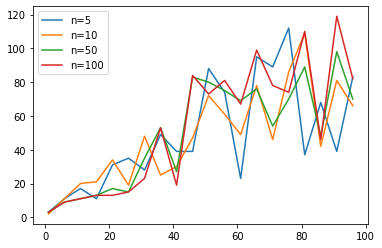

In [44]:
plot_range = range(1, 100, 5)
for n in [5, 10, 50, 100]:
    iters_value = []
    for k in plot_range:
        Q = generate_Q(n, k)
        b = np.random.randn(n)
        f = generate_f(Q, b)
        f_grad = generate_grad(Q, b)
        
        iters_try = []
        for _ in range(1000):
            gd = GradientDescent(
                scheduler=DichotomyScheduler(f, delta=1e-3), 
                function=f, 
                derivative=f_grad, 
                epsilon=0.001, 
                iterations=500, 
                initial_point=np.random.rand(n))
            _, iters = gd.optimize()
            iters_try.append(np.mean(np.array(iters_try)))
        iters_value.append(iters)
    plt.plot(plot_range, iters_value, label=f'n={n}')
plt.xlabel = 'k'
plt.ylabel = 'iters'
plt.legend()



Получаем, что количество итераций до сходимости градиентного спуска линейно зависит от числа обусловленности вне зависимости от размер матрица квадратичной формы.